In [201]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

# 1.

In [130]:
num_levels = 3

a = qt.destroy(num_levels)

a1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels)])
a_c = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a])

k_12 = 2.5e-3
k_qc = 18.9e-3

omega_1 = 4 * 2 * np.pi # 2pi GHz
omega_2 = 4 * 2 * np.pi # 2pi GHz
omega_c = 7 * 2 * np.pi # 2pi GHz

U = -0.2 * 2 * np.pi # 2pi GHz

In [131]:
print(f'g_12: {k_12 * np.sqrt(omega_1 * omega_2)/2/np.pi} MHz')
print(f'g_qc: {k_qc * np.sqrt(omega_1 * omega_c)/2/np.pi} MHz')

g_12: 0.01 MHz
g_qc: 0.10000939955824154 MHz


In [53]:
def generate_Hamiltonian(annihilation_operators, omega_1, omega_2, omega_c, U, k_12, k_qc):
    
    a1, a2, a_c = annihilation_operators
    
    # onsite energy and interaction

    H =  (omega_2 - omega_1) * a2.dag()*a2 + U/2*a2.dag()*a2*(a2.dag()*a2 - 1)
    H += (omega_c - omega_1) * a_c.dag()*a_c + U/2*a_c.dag()*a_c*(a_c.dag()*a_c - 1)


    # coupling
    H += k_12 * np.sqrt(omega_1 * omega_2)*(a1.dag()*a2 + a2.dag()*a1)
    H += k_qc * np.sqrt(omega_1 * omega_c)*(a1.dag()*a_c + a_c.dag()*a1)
    H += k_qc * np.sqrt(omega_2 * omega_c)*(a2.dag()*a_c + a_c.dag()*a2)
    
    return H

In [134]:
H = generate_Hamiltonian([a1, a2, a_c], omega_1, omega_2, omega_c, U, k_12, k_qc)

psi0 = qt.basis([num_levels]*3, [1, 0, 0])

times = np.linspace(0, 200, 101)

e_ops = [a1.dag()*a1, a2.dag()*a2, a_c.dag()*a_c]

result = qt.sesolve(H, psi0, times, e_ops=e_ops)

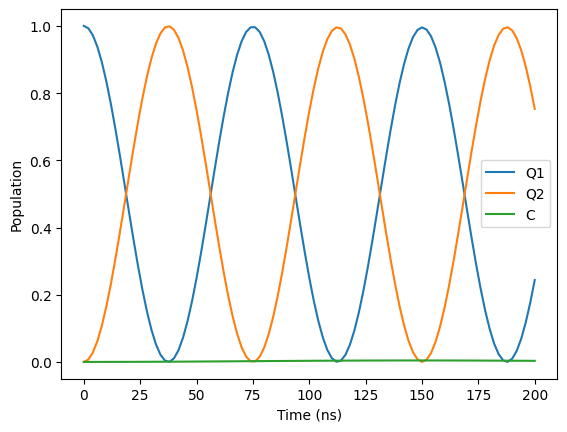

In [135]:
for i in range(3):
    label = f'Q{i+1}'
    if i == 2:
        label = 'C'
    plt.plot(times, result.expect[i], label=label)
    
plt.xlabel('Time (ns)')
plt.ylabel('Population')

plt.legend()
plt.show()

### 1.2 Chevron

In [137]:
num_levels = 3

a = qt.destroy(num_levels)

a1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels)])
a_c = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a])

k_12 = 2.5e-3
k_qc = 18.9e-3

omega_1 = 4 * 2 * np.pi # 2pi GHz
omega_2 = 4 * 2 * np.pi # 2pi GHz
omega_c = 7 * 2 * np.pi # 2pi GHz

U = -0.2 * 2 * np.pi # 2pi GHz

psi0 = qt.basis([num_levels]*3, [1, 0, 0])
times = np.linspace(0, 200, 101)
e_ops = [a1.dag()*a1, a2.dag()*a2, a_c.dag()*a_c]


In [140]:
detunings = np.linspace(-10, 10, 51)/1e3 # MHz

populations = np.zeros((3, len(detunings), len(times)))

for i in range(len(detunings)):
    detuning = detunings[i] * 2 * np.pi
    
#     print(f'detuning: {detuning}')
    
    omega_2 = omega_1 + detuning
    
    H = generate_Hamiltonian([a1, a2, a_c], omega_1, omega_2, omega_c, U, k_12, k_qc)

   
    result = qt.sesolve(H, psi0, times, e_ops=e_ops)
    
    populations[:,i,:] = result.expect

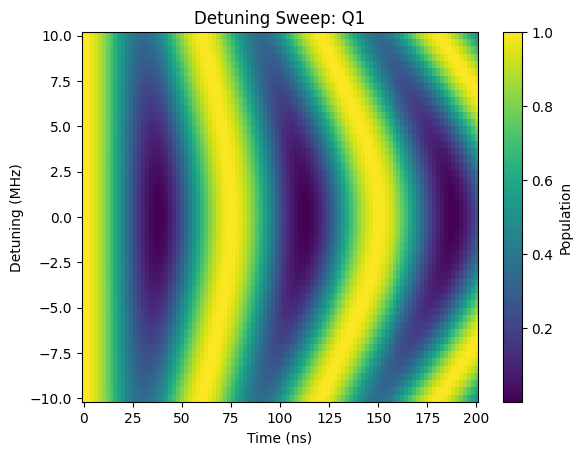

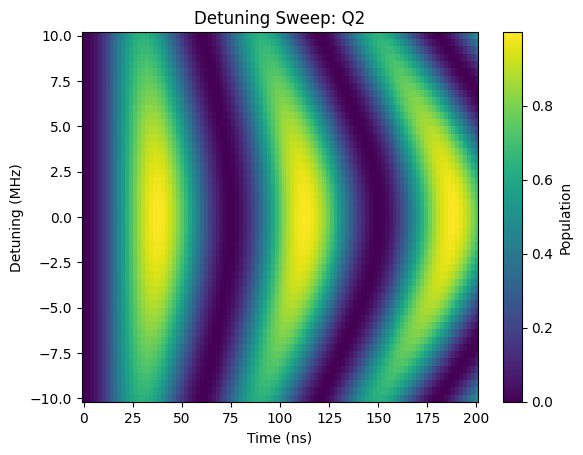

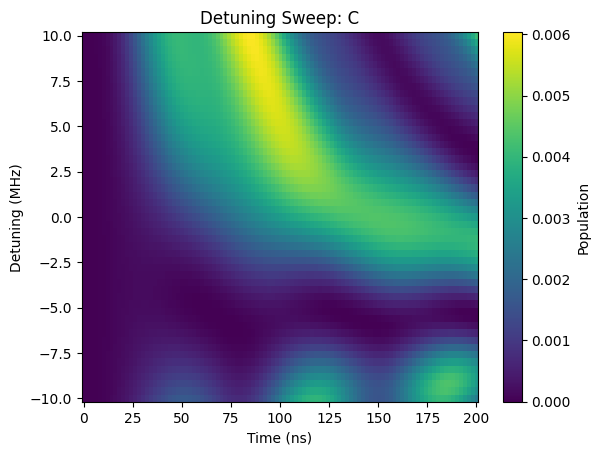

In [141]:
x = times
y = detunings*1e3 # MHz

x_step = x[1] - x[0]
y_step = y[1] - y[0]

extent = (x[0] - x_step/2, x[-1] + x_step/2, y[0] - y_step/2, y[-1] + y_step/2)

# Q1
plt.imshow(populations[0,:,:], aspect='auto', interpolation='none', extent=extent)

plt.xlabel('Time (ns)')
plt.ylabel('Detuning (MHz)')

plt.colorbar(label='Population')
plt.title('Detuning Sweep: Q1')
plt.show()


# Q2
plt.imshow(populations[1,:,:], aspect='auto', interpolation='none', extent=extent)

plt.xlabel('Time (ns)')
plt.ylabel('Detuning (MHz)')

plt.colorbar(label='Population')
plt.title('Detuning Sweep: Q2')
plt.show()


# C
plt.imshow(populations[2,:,:], aspect='auto', interpolation='none', extent=extent)

plt.xlabel('Time (ns)')
plt.ylabel('Detuning (MHz)')

plt.colorbar(label='Population')
plt.title('Detuning Sweep: C')
plt.show()

### 1.3 Sweep Coupler Detuning

In [142]:
num_levels = 3

a = qt.destroy(num_levels)

a1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels)])
a_c = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a])

k_12 = 2.5e-3
k_qc = 18.9e-3

omega_1 = 4 * 2 * np.pi # 2pi GHz
omega_2 = 4 * 2 * np.pi # 2pi GHz
omega_c = 7 * 2 * np.pi # 2pi GHz

U = -0.2 * 2 * np.pi # 2pi GHz

psi0 = qt.basis([num_levels]*3, [1, 0, 0])
times = np.linspace(0, 200, 101)
e_ops = [a1.dag()*a1, a2.dag()*a2, a_c.dag()*a_c]


In [144]:
detunings = np.linspace(-3, 3, 51) # GHz
# detunings = np.linspace(-1, 1, 51) # GHz

populations = np.zeros((3, len(detunings), len(times)))

for i in range(len(detunings)):
    detuning = detunings[i] * 2 * np.pi
    
    omega_c = omega_1 + detuning
    
    H = generate_Hamiltonian([a1, a2, a_c], omega_1, omega_2, omega_c, U, k_12, k_qc)

   
    result = qt.sesolve(H, psi0, times, e_ops=e_ops)
    
    populations[:,i,:] = result.expect

In [145]:
np.sqrt(omega_1 * omega_1)*k_qc/2/np.pi

0.0756

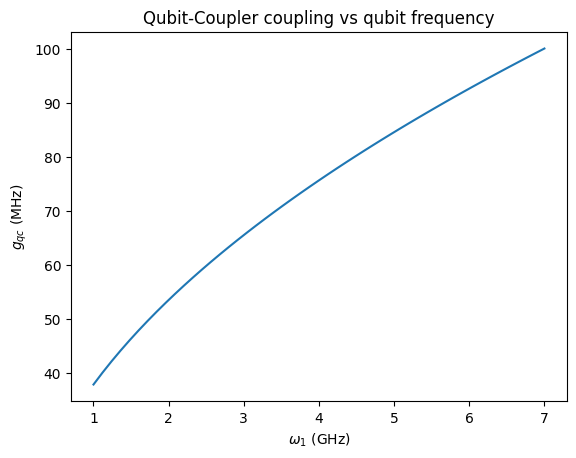

C:\Users\mattm\AppData\Local\Temp\ipykernel_30940\2136862458.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(omega_1/(2*np.pi) + detunings, g_qcs/detunings/2/np.pi)


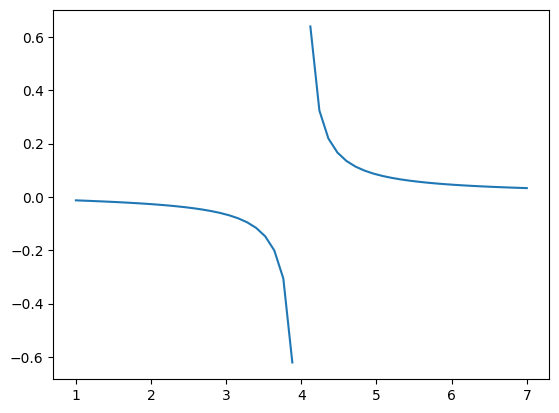

C:\Users\mattm\AppData\Local\Temp\ipykernel_30940\2136862458.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.abs(g_qcs/detunings/2/np.pi), detunings)


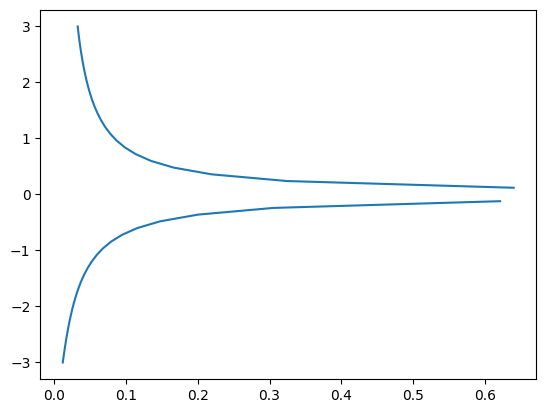

In [146]:
g_qcs = k_qc * np.sqrt(omega_1 * (omega_1 + detunings*2*np.pi))

plt.plot(omega_1/(2*np.pi) + detunings, g_qcs/2/np.pi*1e3)
plt.xlabel('$\omega_1$ (GHz)')
plt.ylabel('$g_{qc}$ (MHz)')
plt.title('Qubit-Coupler coupling vs qubit frequency')
plt.show()

plt.plot(omega_1/(2*np.pi) + detunings, g_qcs/detunings/2/np.pi)
plt.show()

plt.plot(np.abs(g_qcs/detunings/2/np.pi), detunings)
plt.show()


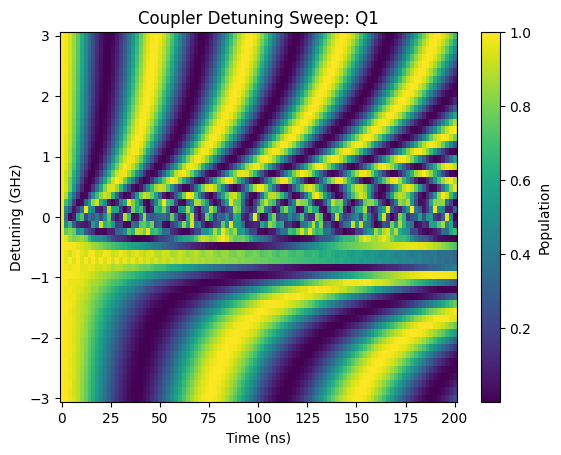

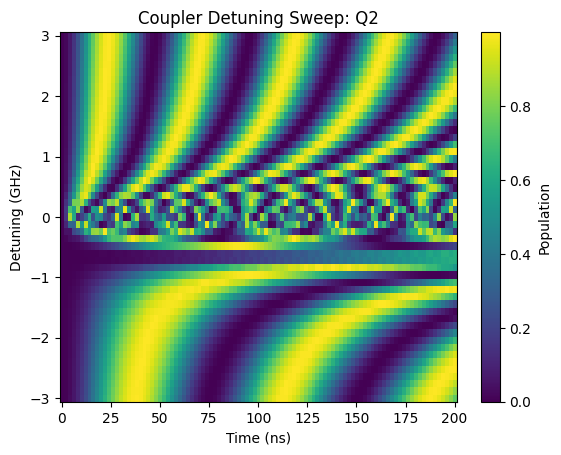

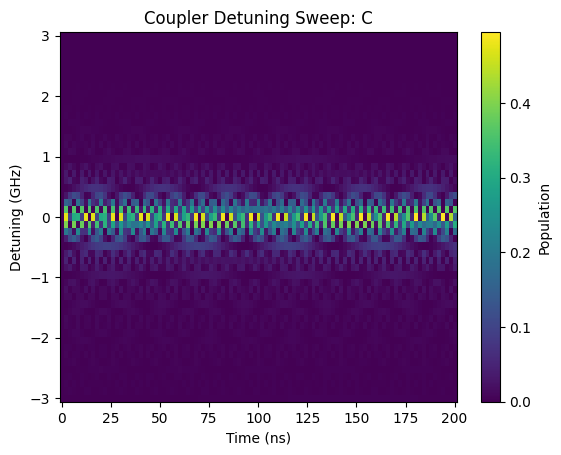

In [147]:
x = times
y = detunings # MHz

x_step = x[1] - x[0]
y_step = y[1] - y[0]

extent = (x[0] - x_step/2, x[-1] + x_step/2, y[0] - y_step/2, y[-1] + y_step/2)




# Q1
plt.imshow(populations[0,:,:], aspect='auto', interpolation='none', extent=extent)

plt.xlabel('Time (ns)')
plt.ylabel('Detuning (GHz)')

plt.colorbar(label='Population')
plt.title('Coupler Detuning Sweep: Q1')
plt.show()


# Q2
plt.imshow(populations[1,:,:], aspect='auto', interpolation='none', extent=extent)

plt.xlabel('Time (ns)')
plt.ylabel('Detuning (GHz)')

plt.colorbar(label='Population')
plt.title('Coupler Detuning Sweep: Q2')
plt.show()


# C
plt.imshow(populations[2,:,:], aspect='auto', interpolation='none', extent=extent)

plt.xlabel('Time (ns)')
plt.ylabel('Detuning (GHz)')

plt.colorbar(label='Population')
plt.title('Coupler Detuning Sweep: C')
plt.show()



# 2. Measure Hybridized States

### 2.1 Single Trace

In [184]:
num_levels = 3

a = qt.destroy(num_levels)

a1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels)])
a_c = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a])

k_12 = 2.5e-3
k_qc = 18.9e-3

omega_1 = 4 * 2 * np.pi # 2pi GHz
omega_2 = 4 * 2 * np.pi # 2pi GHz
omega_c = 5 * 2 * np.pi # 2pi GHz

In [185]:
U = -0.2 * 2 * np.pi # 2pi GHz

psi0 = qt.basis([num_levels]*3, [1, 0, 0])
times = np.linspace(0, 200, 101)

H = generate_Hamiltonian([a1, a2, a_c], omega_1, omega_2, omega_c, U, k_12, k_qc)


result = qt.sesolve(H, psi0, times)

In [186]:
particle_number_to_energies = {}
particle_number_to_states = {}

eigenenergies, eigenstates = H.eigenstates()

total_particle_number_operator = a1.dag()*a1 + a2.dag()*a2 + a_c.dag()*a_c

for i in range(len(eigenstates)):
    particle_number = int(qt.expect(total_particle_number_operator, eigenstates[i]))
    
    if not particle_number in particle_number_to_states:
        particle_number_to_states[particle_number] = []
    particle_number_to_states[particle_number].append(eigenstates[i])
        
    if not particle_number in particle_number_to_energies:
        particle_number_to_energies[particle_number] = []
    particle_number_to_energies[particle_number].append(eigenenergies[i])


In [187]:
print(particle_number_to_energies)

{4: [-1.4196578710897114, 4.83889575664488, 6.044045497824418, 10.126221655025887, 11.289590469044567, 11.84656458137112], 3: [-1.377457789301756, -0.13247889903004229, 4.895774390598318, 6.112166793820213, 11.443551725178011, 11.781469467649833], 2: [-1.3321937607168532, -0.11464999730247882, -0.06357137409312898, 6.232723215598845, 6.291276140534876, 6.307183008780649, 11.53142308864346], 1: [-0.06283185307178854, -0.02656681289222451, 6.372583973143612], 0: [0.0], 5: [4.655712404616624, 10.183647361708278, 11.55001852382934], 6: [10.053096491487338]}


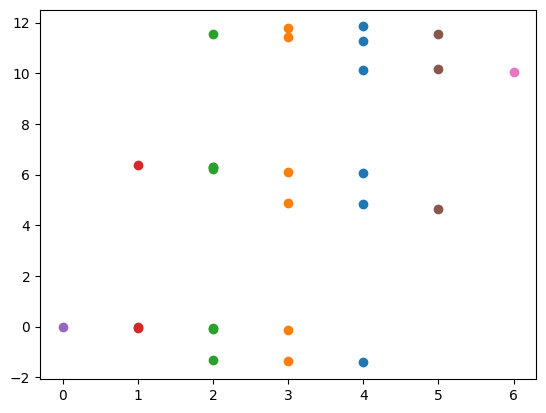

In [188]:
for key in particle_number_to_energies:
    plt.scatter([key]*len(particle_number_to_energies[key]), particle_number_to_energies[key])

In [205]:
full_basis = [bits for bits in product(range(num_levels), repeat=3)]
reduced_basis = [state for state in product(range(num_levels), repeat=3) if sum(state) == 1]

print(full_basis)
print(reduced_basis)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]
[(0, 0, 1), (0, 1, 0), (1, 0, 0)]


In [202]:
full_basis_states = []

for i in range(len(full_basis)):
    full_basis_states.append()

print(full_basis)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


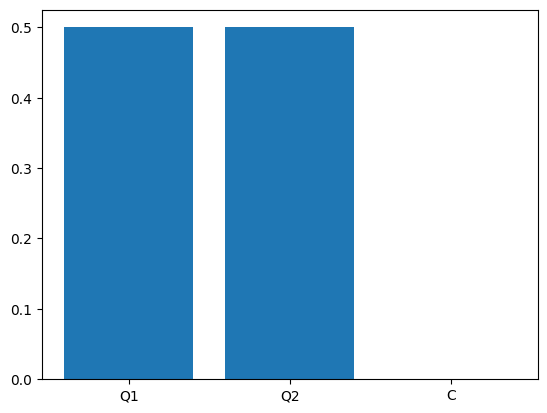

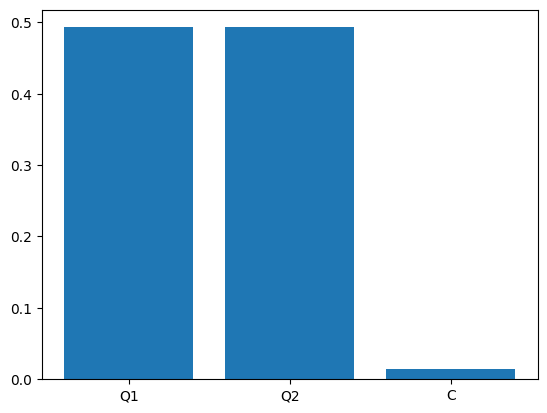

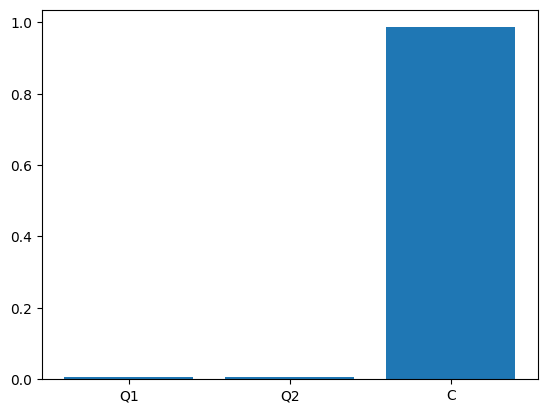

In [218]:
for i in range(len(particle_number_to_states[1])):
    state = particle_number_to_states[1][i]
    data = state.data.to_array()[:,0]
    
    reduced_state = np.zeros(len(reduced_basis), dtype='complex')
    
    for j in range(len(data)):
        full_basis_state = full_basis[j]
        
        if full_basis_state in reduced_basis:
            reduced_index = reduced_basis.index(full_basis_state)
            reduced_state[reduced_index] = data[j]
    
    reduced_state = reduced_state[::-1]
    
    plt.bar(['Q1', 'Q2', 'C'], np.power(np.abs(reduced_state), 2))
    plt.show()

In [223]:
# at every time step, calculate the overlap between the state and the 3 single-particle eigenstates
hybridized_populations = np.zeros((len(particle_number_to_states[1]), len(times)))

for i in range(len(times)):
    state = result.states[i]
    for j in range(len(particle_number_to_states[1])):
        eigenstate = particle_number_to_states[1][j]
        
        hybridized_populations[j,i] = np.power(np.abs(state.overlap(eigenstate)), 2)
    

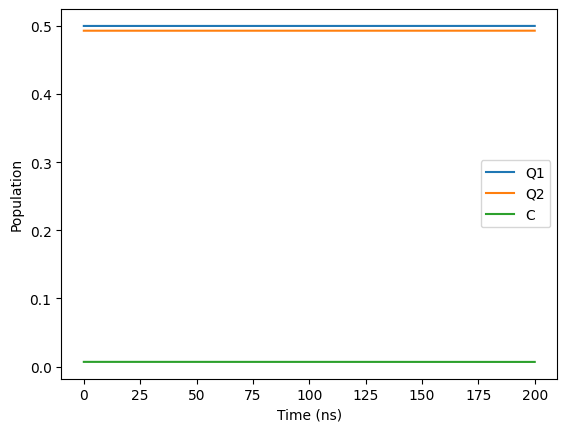

In [225]:
for i in range(hybridized_populations.shape[0]):
    label = f'Q{i+1}'
    if i == 2:
        label = 'C'
    plt.plot(times, hybridized_populations[i], label=label)

plt.xlabel('Time (ns)')
plt.ylabel('Population')

plt.legend()
plt.show()